# Atividade 6 - Modelo SVM

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
df_iris = pd.DataFrame(data['data'], columns=data.feature_names)
df_iris['target'] = data.target

In [3]:
df_iris.head(80)
#Iris Setosa -->0
#Iris Versicolor --> 1
#Iris Virginica --> 2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
75,6.6,3.0,4.4,1.4,1
76,6.8,2.8,4.8,1.4,1
77,6.7,3.0,5.0,1.7,1
78,6.0,2.9,4.5,1.5,1


In [4]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
X = df_iris.drop('target', axis=1)
y = df_iris['target']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

##### Kernel default: RBF(Exponencial)

In [8]:
#Parâmetros:
#kernel default: rbf(exponencial)
#C default: 1,0
#gama default: escala = 1 / (n_features * X.var ()) como valor de gama
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [9]:
y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Variações -- Adicionais com diferentes KERNEL's
Os algoritmos SVM usam um grupo de funções matemáticas conhecidas como kernels. A função de um kernel é requerer dados como entrada e transformá-los na forma desejada. Diferentes algoritmos de SVM usam diferentes tipos de funções de kernel. Essas funções são de diferentes tipos - por exemplo, linear, não linear, polinomial, função de base radial (RBF) e sigmóide. O tipo mais preferido de função do kernel é RBF. Porque é localizado e tem uma resposta finita ao longo do eixo x completo.As funções do kernel retornam o produto escalar entre dois pontos em um espaço de recursos extremamente adequado. Assim, definindo uma noção de semelhança, com um pequeno custo de computação mesmo no caso de espaços de dimensões muito elevadas.
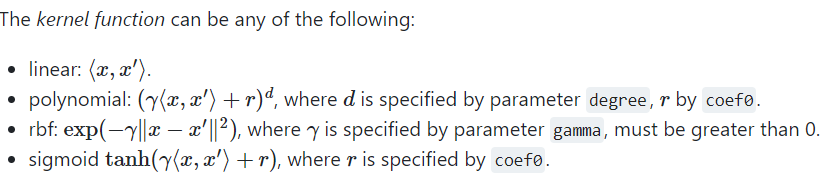

##### Kernel: Polinomial

In [11]:
#Kernel: degree(grau) somente para o kernel polinomial 
model_poly = SVC(kernel='poly', degree=3)
model_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [12]:
y_pred_poly = model_poly.predict(X_test)

In [13]:
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



##### Kernel: Linear

In [18]:
#Kernel: linear
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
y_pred_linear = model_linear.predict(X_test)

In [20]:
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



##### Kernel: Sigmoidal

In [14]:
#Kernel: sigmoid
model_sig = SVC(kernel='sigmoid')
model_sig.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [15]:
y_pred_sig = model_sig.predict(X_test)

In [16]:
#Isso ocorre porque a função sigmóide retorna dois valores, 0 e 1, portanto é mais adequada para problemas de classificação binária. No entanto, em nosso caso, tínhamos três classes de saída.
import warnings
warnings.filterwarnings("ignore")
print(confusion_matrix(y_test, y_pred_sig))
print(classification_report(y_test, y_pred_sig))

[[ 0  0 19]
 [ 0 10  3]
 [ 0 13  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.43      0.77      0.56        13
           2       0.00      0.00      0.00        13

    accuracy                           0.22        45
   macro avg       0.14      0.26      0.19        45
weighted avg       0.13      0.22      0.16        45



### Adicional -- Explicando de forma sucinta a divisão
Primeiro, o algoritmo recebe os dados das flores em um formato similar ao do gráfico abaixo (só que em mais dimensões).
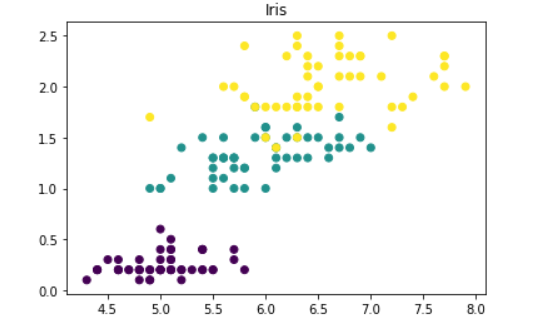

Depois, para encontrar as delineações e separar as classes, ele transforma não linearmente a entrada para depois separá-la por um hiperplano. Assim, as delimitações no espaço das entradas, mostrado na imagem abaixo, são não lineares, como visto anteriormente.
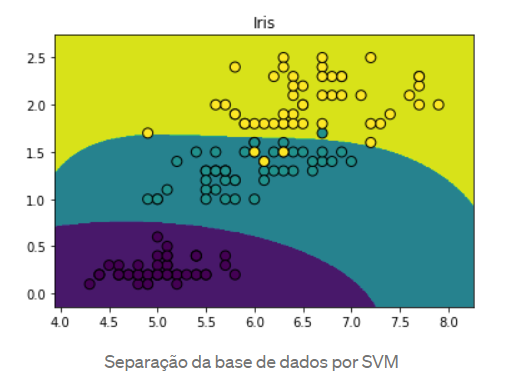